In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('data/Combined Data.csv')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [40]:
df = df.drop(columns=['Unnamed: 0']).dropna()
df

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [41]:
df['status'].value_counts()

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from transformers import BertModel, BertTokenizer
from sklearn.metrics import roc_curve, auc, accuracy_score

Tamanhos de dataset a serem testados:
- 1000
- 2000
- 5000
- 10000
- 20000
- 40000
- 52681 (tamanho do dataset original após filtragem de dados NaN)

### Dataset com 1000 samples


In [43]:
df_1000 = df.sample(1000, random_state=42)
df_1000['status'].value_counts()

status
Normal                  301
Depression              297
Suicidal                219
Anxiety                  63
Stress                   56
Bipolar                  46
Personality disorder     18
Name: count, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df_1000['statement'], df_1000['status'], test_size=0.2, random_state=42)

In [45]:
model_1000 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression(max_iter=1000))
])

model_1000.fit(X_train, y_train)
y_pred = model_1000.predict(X_test)
acc_bow_1000 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc_bow_1000:.4f}')


Accuracy: 0.6800


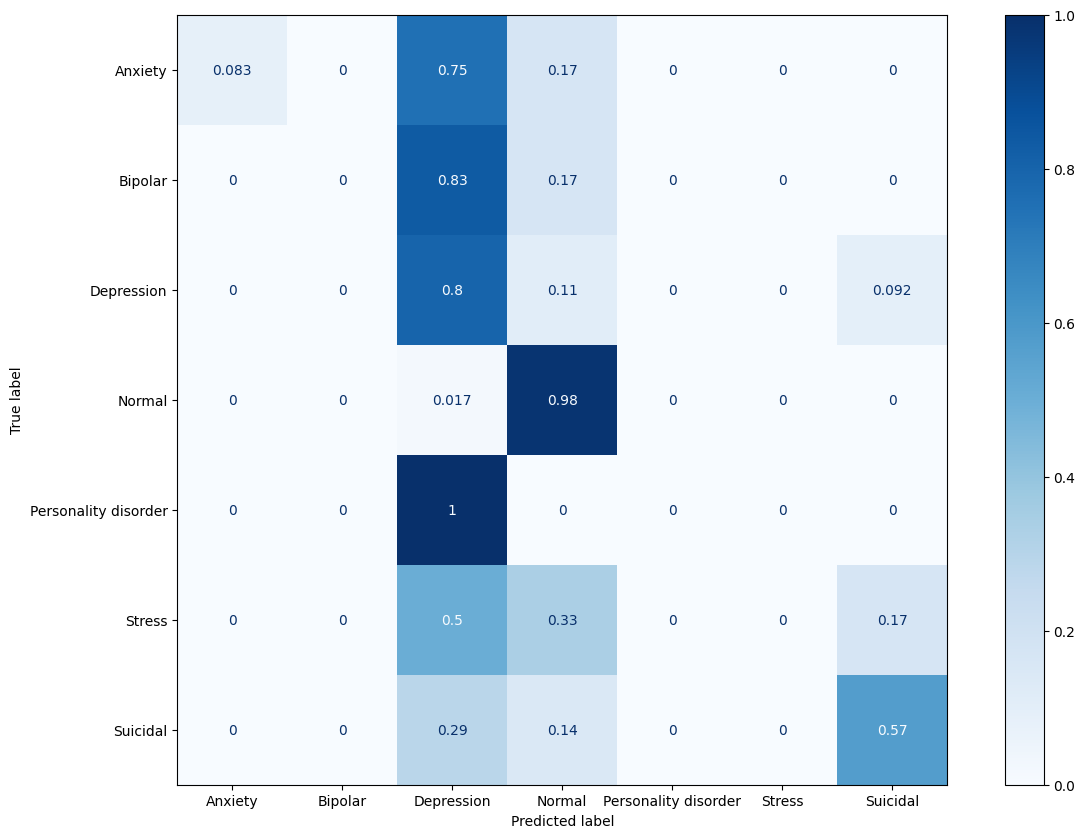

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

c = confusion_matrix(y_test, y_pred, normalize='true')

fig, ax = plt.subplots(figsize=(15,10))

disp = ConfusionMatrixDisplay(c, display_labels=model_1000.classes_)
disp.plot(ax=ax, cmap='Blues')

plt.show()


In [47]:
import numpy as np
from tqdm import tqdm

model_bert = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def get_embeddings(text, model, tokenizer):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[0, 0, :]
    return cls_embedding

embeddings = []
for i in tqdm(range(len(df_1000['statement']))):
    e = get_embeddings(df_1000['statement'].iloc[i], model_bert, tokenizer)
    embeddings.append(e.detach().numpy())
embeddings = np.array(embeddings)

100%|██████████| 1000/1000 [02:19<00:00,  7.16it/s]


In [48]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, df_1000['status'], test_size=0.2, random_state=42)
clf_bert = LogisticRegression(max_iter=1000)
clf_bert.fit(X_train, y_train)
y_pred = clf_bert.predict(X_test)
acc_bert_1000 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc_bert_1000:.4f}')

Accuracy: 0.6250


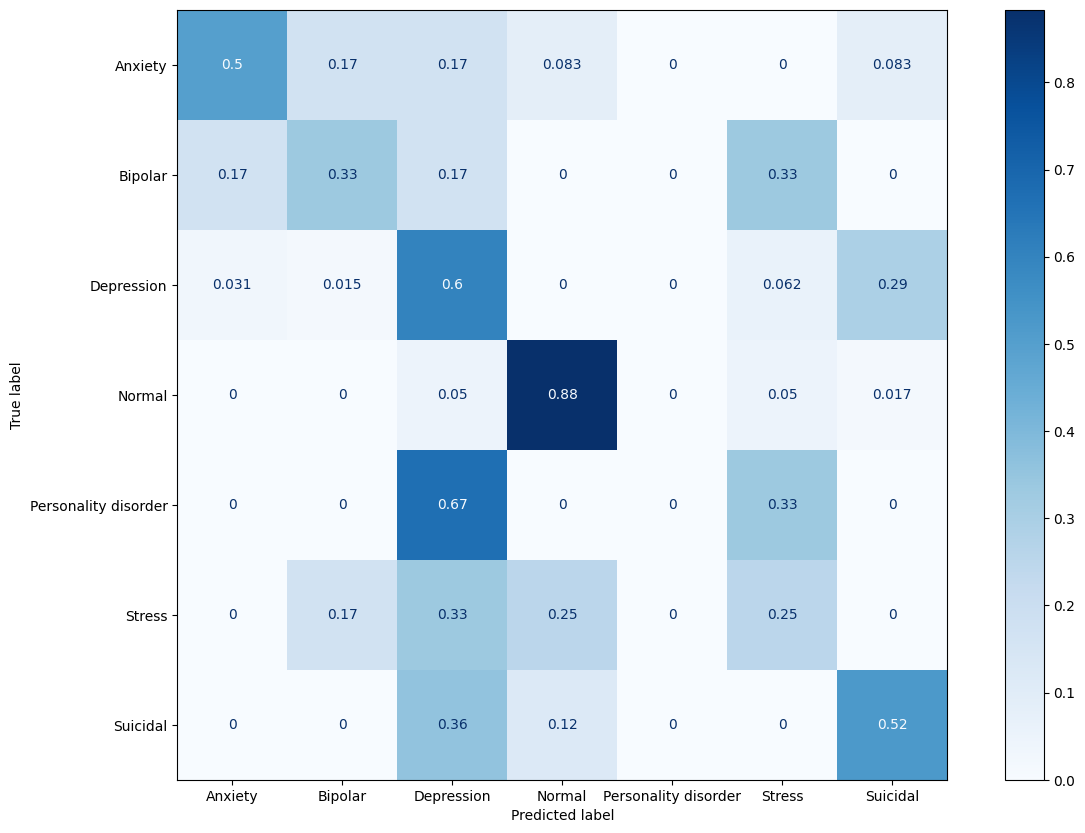

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

c = confusion_matrix(y_test, y_pred, normalize='true')

fig, ax = plt.subplots(figsize=(15,10))  
disp = ConfusionMatrixDisplay(c, display_labels=clf_bert.classes_)
disp.plot(ax=ax, cmap='Blues')

plt.show()


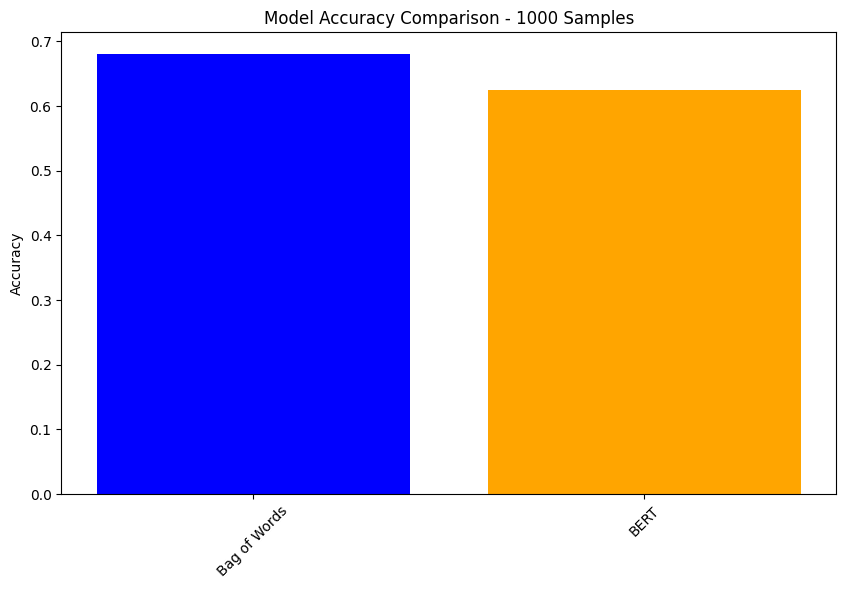

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(['Bag of Words', 'BERT'], [acc_bow_1000, acc_bert_1000], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison - 1000 Samples')
plt.xticks(rotation=45)
plt.show()

### Dataset com 2000 samples


In [51]:
df_2000 = df.sample(2000, random_state=42)
df_2000['status'].value_counts()

status
Normal                  617
Depression              605
Suicidal                398
Anxiety                 134
Stress                  102
Bipolar                  98
Personality disorder     46
Name: count, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df_2000['statement'], df_2000['status'], test_size=0.2, random_state=42)


In [53]:
model_2000 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('logreg', LogisticRegression(max_iter=1000))
])
model_2000.fit(X_train, y_train)
y_pred = model_2000.predict(X_test)
acc_bow_2000 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc_bow_2000:.4f}')

Accuracy: 0.6125


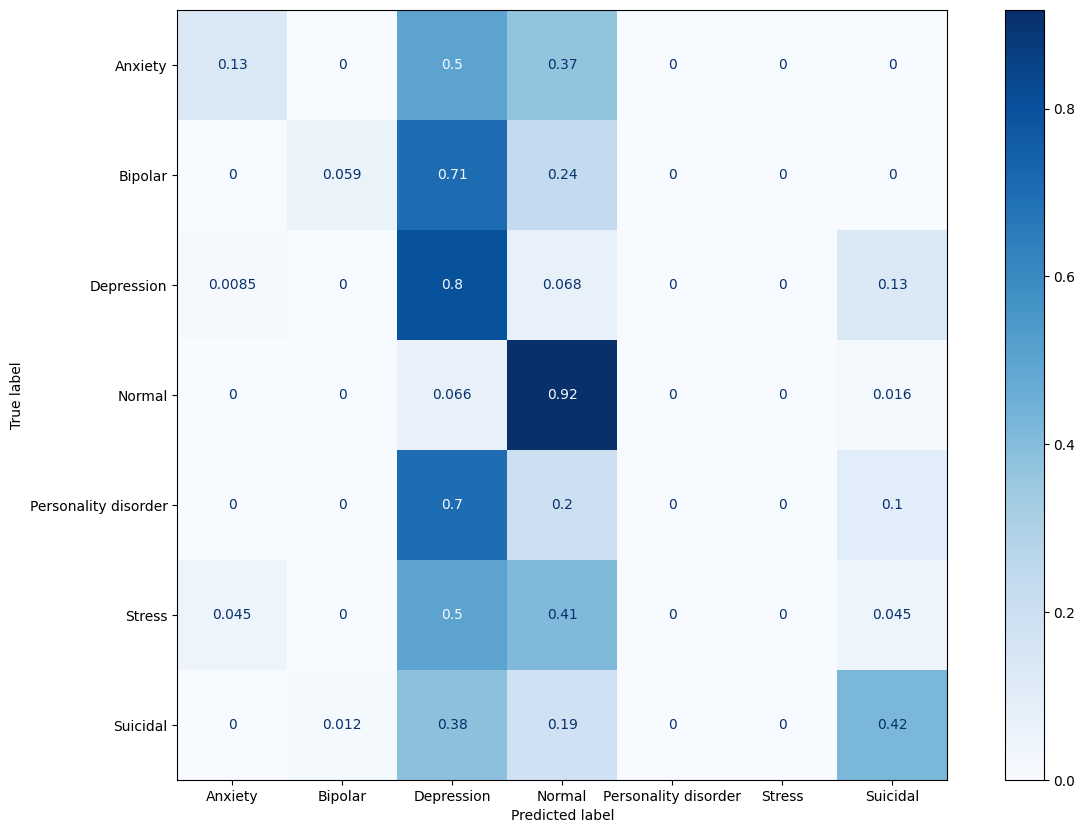

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

c = confusion_matrix(y_test, y_pred, normalize='true')

fig, ax = plt.subplots(figsize=(15,10))

disp = ConfusionMatrixDisplay(c, display_labels=model_2000.classes_)
disp.plot(ax=ax, cmap='Blues')

plt.show()

In [55]:
embeddings = []
for i in tqdm(range(len(df_2000['statement']))):
    e = get_embeddings(df_2000['statement'].iloc[i], model_bert, tokenizer)
    embeddings.append(e.detach().numpy())
embeddings = np.array(embeddings)

100%|██████████| 2000/2000 [04:35<00:00,  7.27it/s]


In [56]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, df_2000['status'], test_size=0.2, random_state=42)
clf_bert = LogisticRegression(max_iter=1000)
clf_bert.fit(X_train, y_train)
y_pred = clf_bert.predict(X_test)
acc_bert_2000 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc_bert_2000:.4f}')

Accuracy: 0.6575


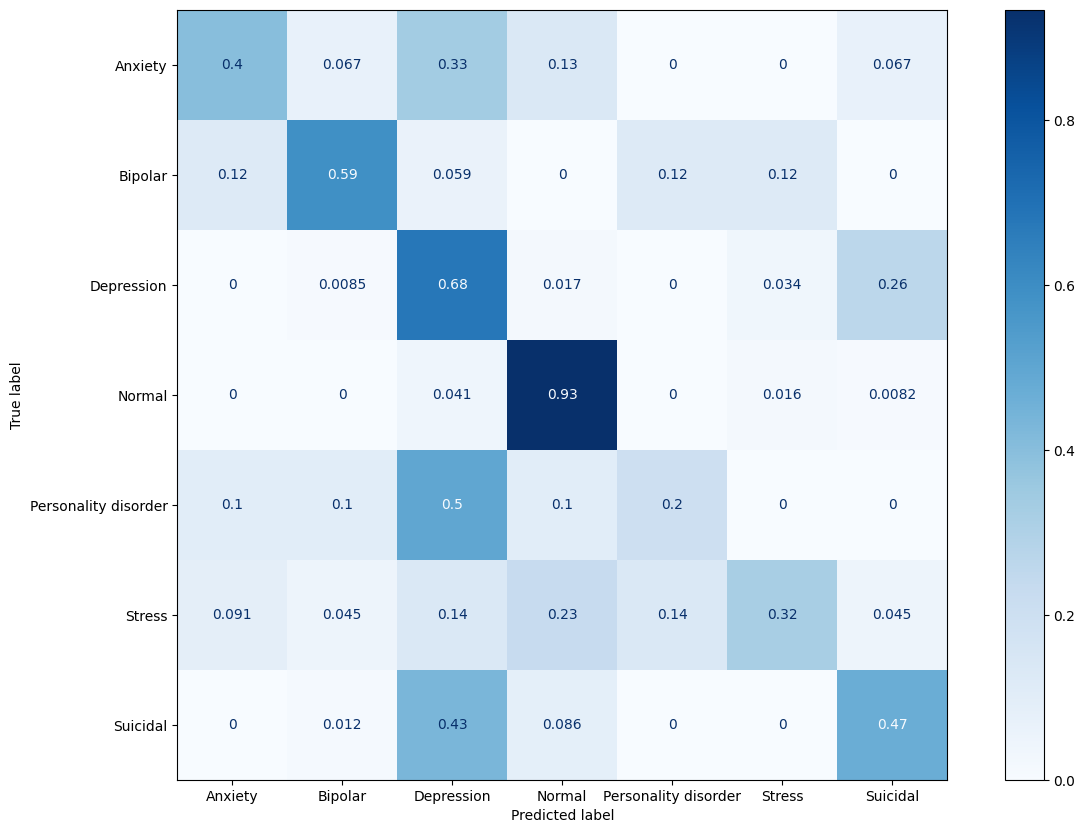

In [57]:
c = confusion_matrix(y_test, y_pred, normalize='true')

fig, ax = plt.subplots(figsize=(15,10))  
disp = ConfusionMatrixDisplay(c, display_labels=clf_bert.classes_)
disp.plot(ax=ax, cmap='Blues')

plt.show()


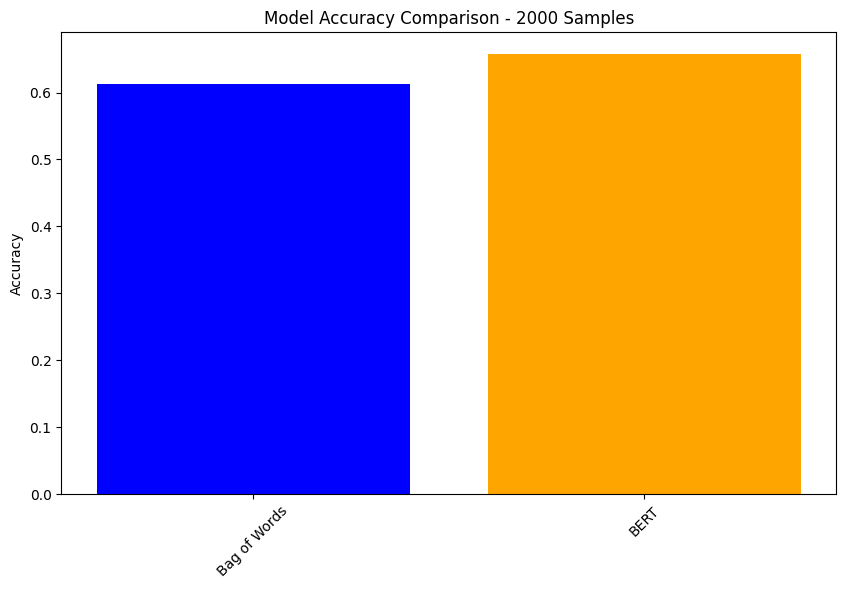

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(['Bag of Words', 'BERT'], [acc_bow_2000, acc_bert_2000], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison - 2000 Samples')
plt.xticks(rotation=45)
plt.show()

### Dataset com 5000 samples

In [59]:
df_5000 = df.sample(5000, random_state=42)
df_5000['status'].value_counts()

status
Normal                  1576
Depression              1437
Suicidal                1029
Anxiety                  349
Bipolar                  255
Stress                   241
Personality disorder     113
Name: count, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df_5000['statement'], df_5000['status'], test_size=0.2, random_state=42)

In [61]:
model_5000 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('logreg', LogisticRegression(max_iter=1000))
])
